In [ ]:
import numpy as np
from numpy import pi, r_
from PIL import Image
import imageio
import statistics
from __future__ import print_function
import datetime
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

# Functions

## 1D Gauss Fitting 

In [ ]:
def gauss(x, H, A, x0, sigma):
    """ Calculate the probabilty density function (gauss_2d).
    x0 = expected value
    sigma = standart deviation
    A = height of the curve's peak
    """
    return  A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))


In [ ]:
def gauss_fit(x, y):
    mean = sum(x * y) / sum(y); sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    
    fwhm = 2.355 * popt[3] # 2.355 * sigma #FWHM =>sqrt(8*ln2)*sigma
    
    popt = np.append(popt, fwhm) # include FWHM in the output
    
    return popt

In [ ]:
def gauss_2d(height, center_x, center_y, width_x, width_y):
    """Returns a 2D gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(-(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gauss_2d parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def gauss_2d_fit(data):
    """Returns (height, x, y, width_x, width_y)
    the gauss_2d parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gauss_2d(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

# Beam Before BS (26/02)

## Importing Data

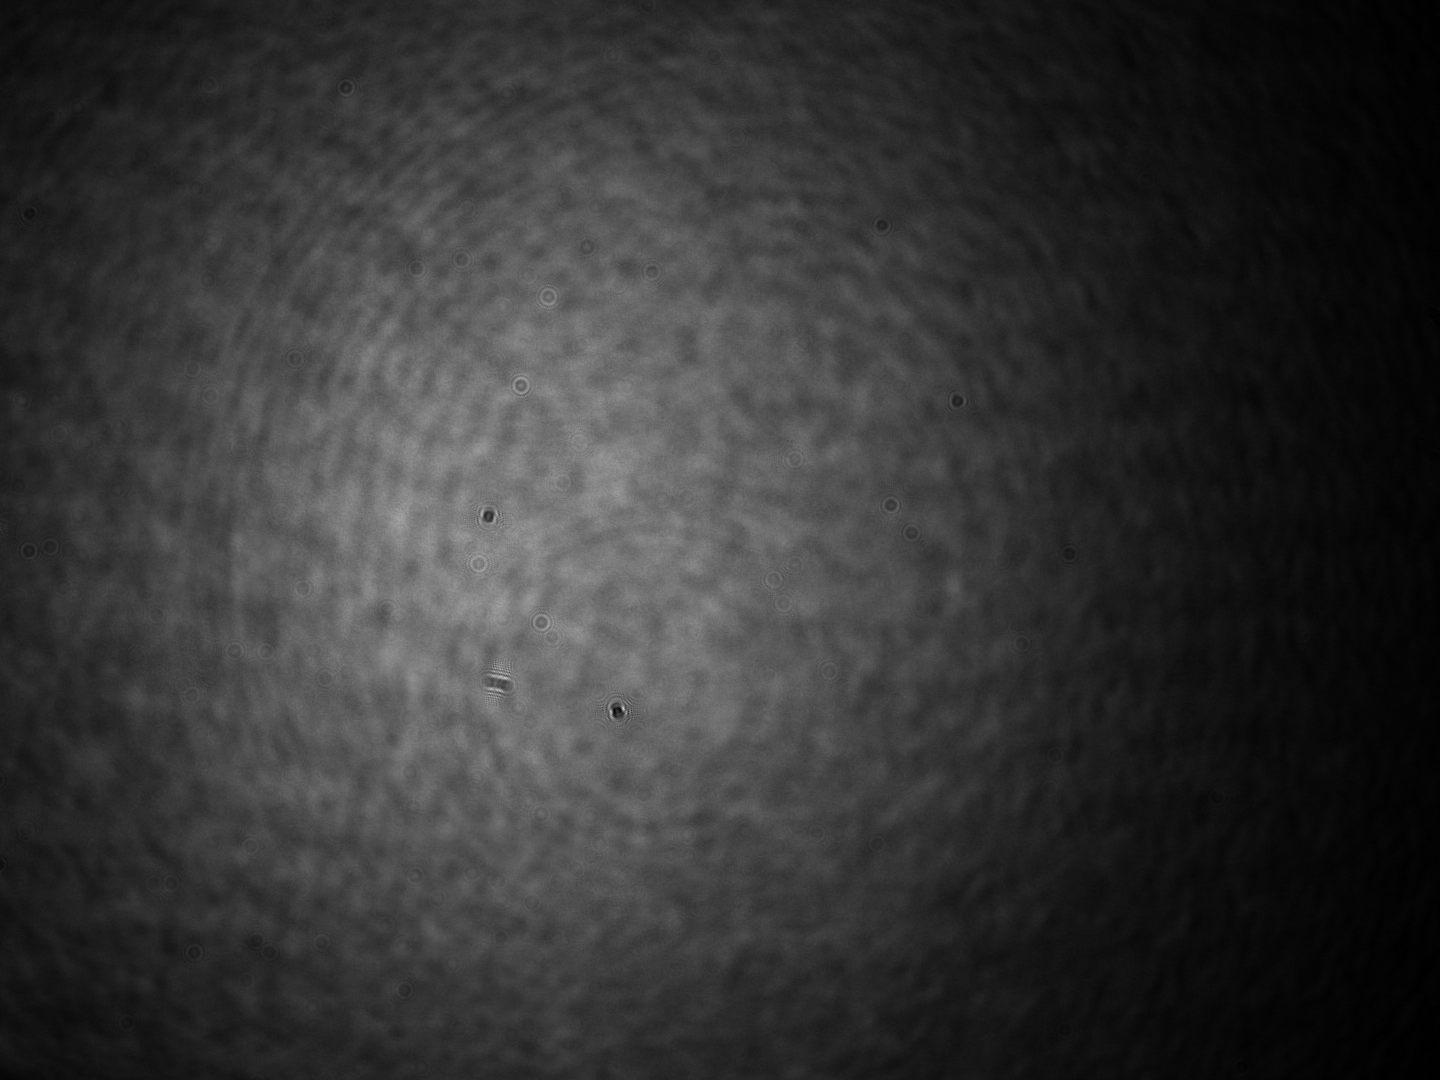

In [ ]:
before_bs_g_data  = np.loadtxt("13ms_532nm_before_bs013_g.txt")
before_bs_2_g_data  = np.loadtxt("13ms_532nm_before_bs013_2_g.txt")


before_bs_g = np.array(before_bs_g_data ,dtype="uint8")

Image.fromarray(before_bs_g,mode="L")




## Choosing Intensity axis

### Choosing x-axis of intensity

In [ ]:
np.where(before_bs_g_data == before_bs_g_data.max())

(array([708], dtype=int64), array([623], dtype=int64))

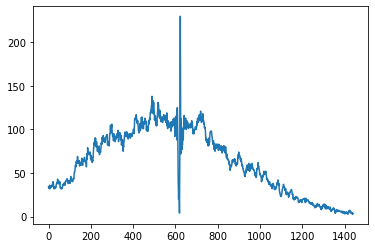

In [ ]:
plt.plot(before_bs_g_data[708]) 

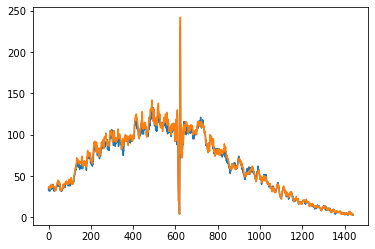

In [ ]:
axis_num=708


plt.plot(before_bs_g_data[axis_num]) 
plt.plot(before_bs_2_g_data[axis_num]) 


### Choosing y-axis of intensity

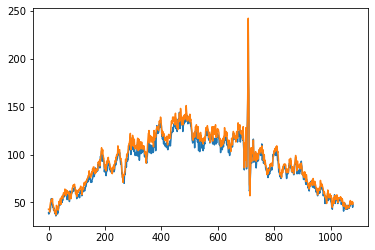

In [ ]:
axis_num_y=623

plt.plot(before_bs_g_data[:,axis_num_y]) 
plt.plot(before_bs_2_g_data[:,axis_num_y]) 


## Gauss Fit

### 1D Gauss Fit

#### Converting array to list for fit

In [ ]:

#x axis
before_bs_g_list_x=before_bs_g_data[axis_num].tolist()
before_bs_2_g_list_x=before_bs_2_g_data[axis_num].tolist()

#y axis
before_bs_g_list_y=before_bs_g_data[:,axis_num].tolist()
before_bs_2_g_list_y=before_bs_2_g_data[:,axis_num].tolist()

y_range_um = np.arange(0, 1440)*3.45
x_range_um = np.arange(0, 1080)*3.45






#### Values for Gaussian Fit

In [ ]:
#x axis
H_2, A_2, x0_2, sigma_2, fwhm_2 = gauss_fit(y_range_um, before_bs_g_list_x)
sigma_2=float(str(sigma_2)[:5])

H_3, A_3, x0_3, sigma_3, fwhm_3 = gauss_fit(y_range_um, before_bs_2_g_list_x)
sigma_3=float(str(sigma_3)[:5])



#y axis
H_2_y, A_2_y, x0_2_y, sigma_2_y, fwhm_2_y = gauss_fit(x_range_um, before_bs_g_list_y)
sigma_2_y=float(str(sigma_2_y)[:5])

H_3_y, A_3_y, x0_3_y, sigma_3_y, fwhm_3_y = gauss_fit(x_range_um, before_bs_2_g_list_y)
sigma_3_y=float(str(sigma_3_y)[:5])


#H i sıfıra zorla öyle hesapla


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
H_2

3.0

#### Plot Beam Before BS

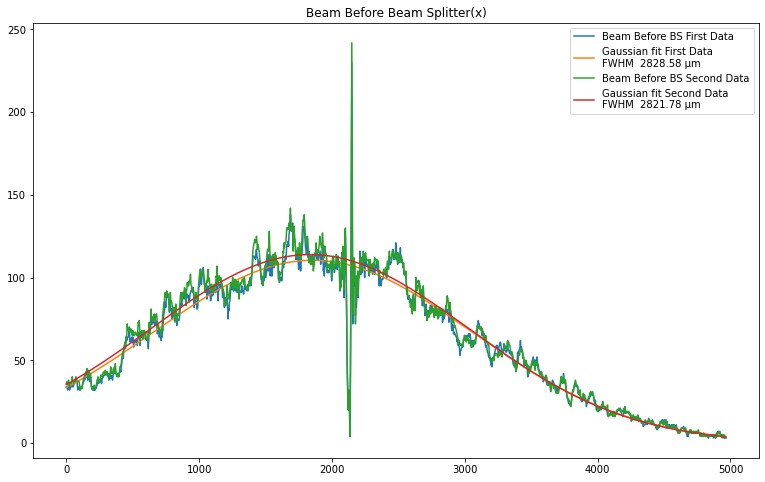

In [ ]:
fig = plt.figure(figsize=(13, 8))

plt.plot(y_range_um,before_bs_g_data[axis_num], label="Beam Before BS First Data ")
plt.plot(y_range_um, gauss(y_range_um, H_2, A_2, x0_2, sigma_2),  label='Gaussian fit First Data \nFWHM  %.2f μm' %fwhm_2)


plt.plot(y_range_um,before_bs_2_g_data[axis_num], label="Beam Before BS Second Data")
plt.plot(y_range_um, gauss(y_range_um, H_3, A_3, x0_3, sigma_3),  label='Gaussian fit Second Data \nFWHM  %.2f μm' %fwhm_3)

plt.title('Beam Before Beam Splitter(x)')
plt.legend()

#### Y axis

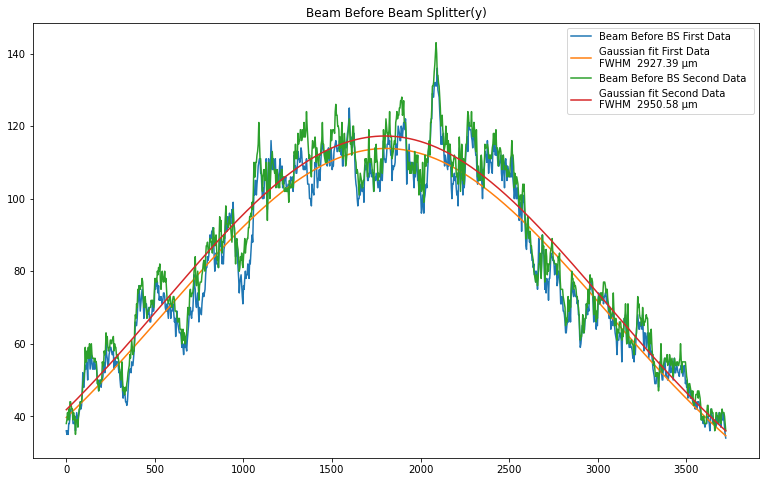

In [ ]:
fig = plt.figure(figsize=(13, 8))


plt.plot(x_range_um,before_bs_g_data[:,axis_num], label="Beam Before BS First Data")
plt.plot(x_range_um, gauss(x_range_um, H_2_y, A_2_y, x0_2_y,sigma_2_y),  label='Gaussian fit First Data \nFWHM  %.2f μm' %fwhm_2_y)

plt.plot(x_range_um,before_bs_2_g_data[:,axis_num], label="Beam Before BS Second Data ")
plt.plot(x_range_um, gauss(x_range_um, H_3_y, A_3_y, x0_3_y,sigma_3_y),  label='Gaussian fit Second Data  \nFWHM  %.2f μm' %fwhm_3_y)

plt.title('Beam Before Beam Splitter(y)')
plt.legend()

#  Final Beam 

## Importing Data

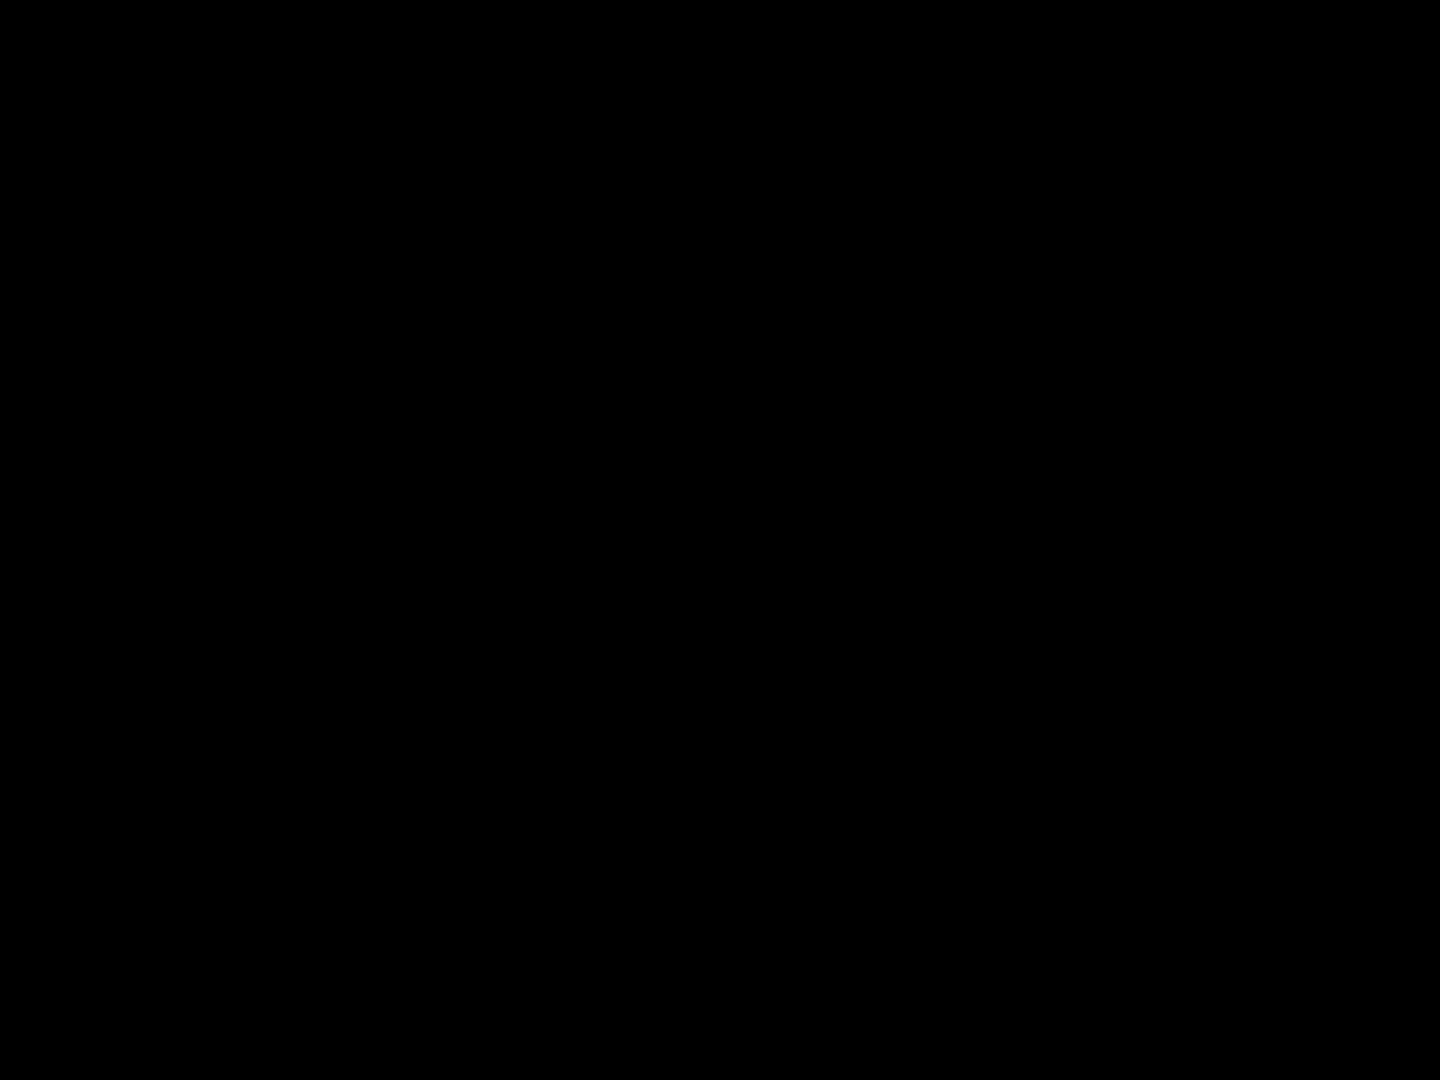

In [ ]:
camera_200mm_data = np.loadtxt("0_45ms_532nm_camera_200mm_g.txt")
camera_200mm_data_2 = np.loadtxt("0_45ms_532nm_camera_200mm_2_g.txt")



Image.fromarray(camera_200mm_data,mode="L")

In [ ]:
np.where(camera_200mm_data == camera_200mm_data.max())


(array([483], dtype=int64), array([694], dtype=int64))

In [ ]:
np.where(camera_200mm_data_2 == camera_200mm_data_2.max())

(array([482, 483], dtype=int64), array([693, 692], dtype=int64))

## Choosing Intensity axis

### x-axis of intensity

In [ ]:
num_axis_x_1 = 483; num_axis_y_1 = 694 ;num_axis_y_2 = 692; num_axis_x_2 = 483

(679.0, 709.0)

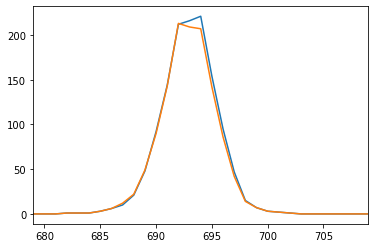

In [ ]:
plt.plot(camera_200mm_data[num_axis_x_1])
plt.plot(camera_200mm_data_2[num_axis_x_2])
plt.xlim(num_axis_y_1-15,num_axis_y_1+15)


### y-axis of intensity

(468.0, 498.0)

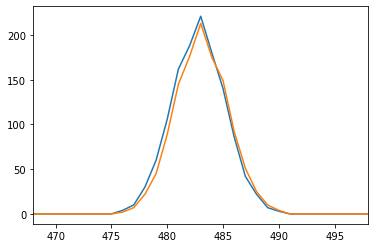

In [ ]:
plt.plot(camera_200mm_data[:,num_axis_y_1])
plt.plot(camera_200mm_data_2[:,num_axis_y_2])
plt.xlim(num_axis_x_1-15,num_axis_x_1+15)


##  Gauss Fitting Final Beam

#### Converting array to list for fit

In [ ]:
camera_200mm_x_list=camera_200mm_data[num_axis_x_1].tolist()

camera_200mm_y_list=camera_200mm_data[:,num_axis_y_1].tolist()


camera_200mm_2_x_list=camera_200mm_data_2[num_axis_x_2].tolist()

camera_200mm_2_y_list=camera_200mm_data_2[:,num_axis_y_2].tolist()







#### Values of Gaussian fit

In [ ]:
#First data


#x
H_x, A_x, x0_x, sigma_x,fwhm_x = gauss_fit(y_range_um, camera_200mm_x_list)


#y
H_y, A_y, x0_y, sigma_y,fwhm_y = gauss_fit(x_range_um, camera_200mm_y_list)


#Second data

#x
H_x_2, A_x_2, x0_x_2, sigma_x_2,fwhm_x_2 = gauss_fit(y_range_um, camera_200mm_2_x_list)


#y
H_y_2, A_y_2, x0_y_2, sigma_y_2,fwhm_y_2 = gauss_fit(x_range_um, camera_200mm_2_y_list)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


#### Plot Final Beam

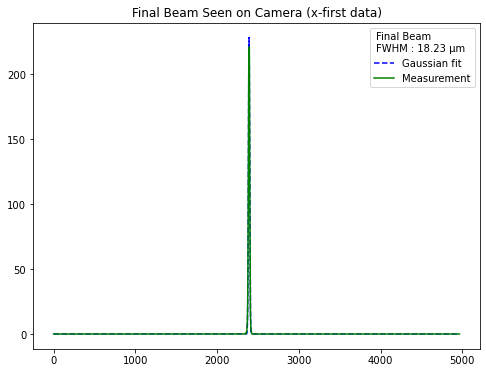

In [ ]:
fig = plt.figure(figsize=(8, 6))



plt.plot(y_range_um, gauss(y_range_um, H_x, A_x, x0_x,sigma_x), '--b', label='Gaussian fit' )
plt.plot(y_range_um,camera_200mm_data[num_axis_x_1],"green",label="Measurement")

plt.title('Final Beam Seen on Camera (x-first data)')

plt.legend(title="Final Beam \nFWHM : " + str(fwhm_x)[:5] +" μm ")


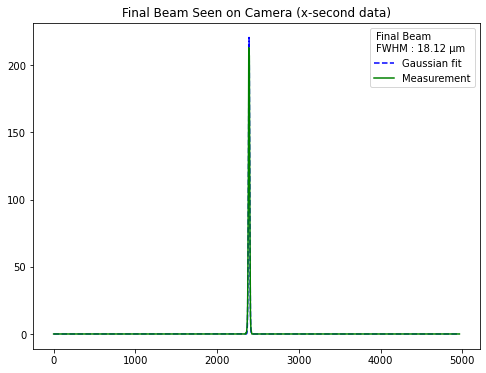

In [ ]:
fig = plt.figure(figsize=(8, 6))



plt.plot(y_range_um, gauss(y_range_um, H_x_2, A_x_2, x0_x_2,sigma_x_2), '--b', label='Gaussian fit' )
plt.plot(y_range_um,camera_200mm_data_2[num_axis_x_2],"green",label="Measurement")

plt.title('Final Beam Seen on Camera (x-second data)')

plt.legend(title="Final Beam \nFWHM : " + str(fwhm_x_2)[:5] +" μm ")
